https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data

In [60]:
!pip install sodapy
from sodapy import Socrata
from google.colab import drive
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive/', force_remount=True)
sys.path.append("/content/drive/MyDrive")
import prjct3secrets

Mounted at /content/drive/


In [61]:
client = Socrata("data.cityofnewyork.us",
                 prjct3secrets.api_key,
                 username = prjct3secrets.username,
                 password = prjct3secrets.password)

results = client.get("uip8-fykc", limit=6000000)

df = pd.DataFrame.from_records(results)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   arrest_key                   71242 non-null  object
 1   arrest_date                  71242 non-null  object
 2   pd_cd                        71242 non-null  object
 3   pd_desc                      71242 non-null  object
 4   ky_cd                        71238 non-null  object
 5   ofns_desc                    71242 non-null  object
 6   law_code                     71242 non-null  object
 7   law_cat_cd                   70881 non-null  object
 8   arrest_boro                  71242 non-null  object
 9   arrest_precinct              71242 non-null  object
 10  jurisdiction_code            71242 non-null  object
 11  age_group                    71242 non-null  object
 12  perp_sex                     71242 non-null  object
 13  perp_race                    71

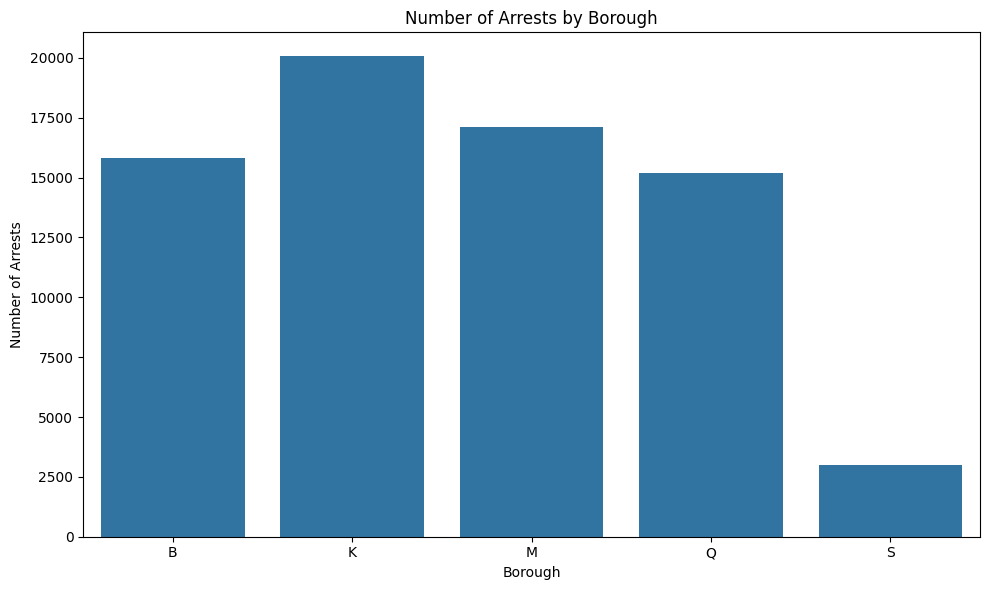

In [63]:
arrest_boro_count = df.groupby(['arrest_boro'])['arrest_key'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_boro_count.index, y=arrest_boro_count.values)
plt.title('Number of Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks()
plt.tight_layout()
plt.show()

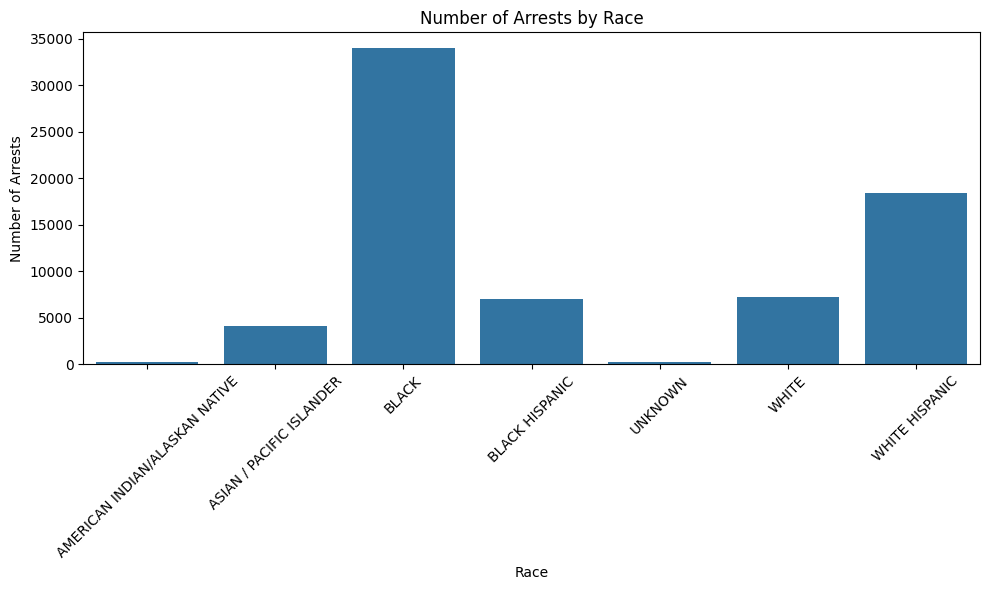

In [64]:
arrest_race_count = df.groupby(['perp_race'])['arrest_key'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_race_count.index, y=arrest_race_count.values)
plt.title('Number of Arrests by Race')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

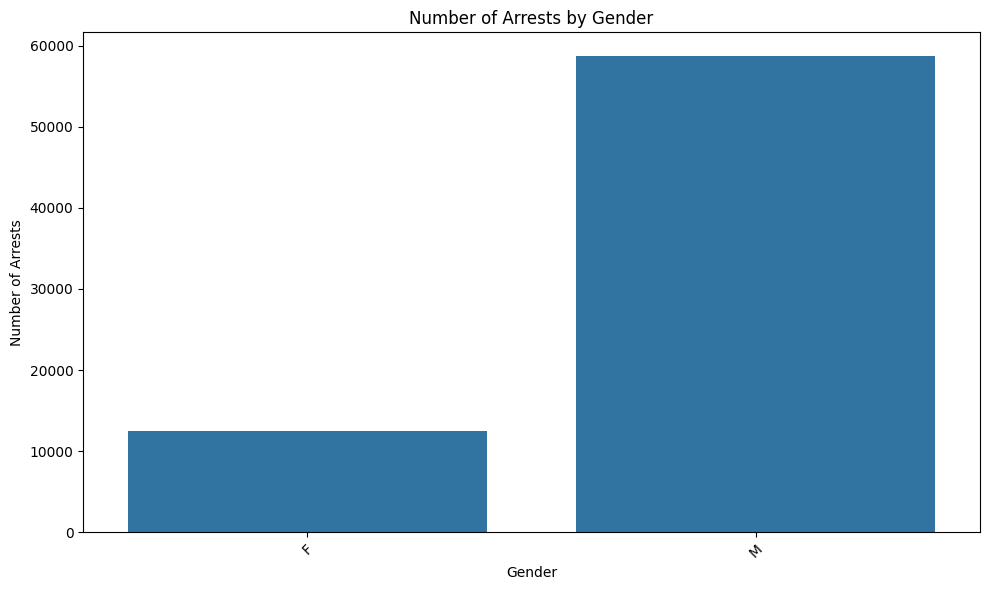

In [65]:
arrest_sex_count = df.groupby(['perp_sex'])['arrest_key'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_sex_count.index, y=arrest_sex_count.values)
plt.title('Number of Arrests by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

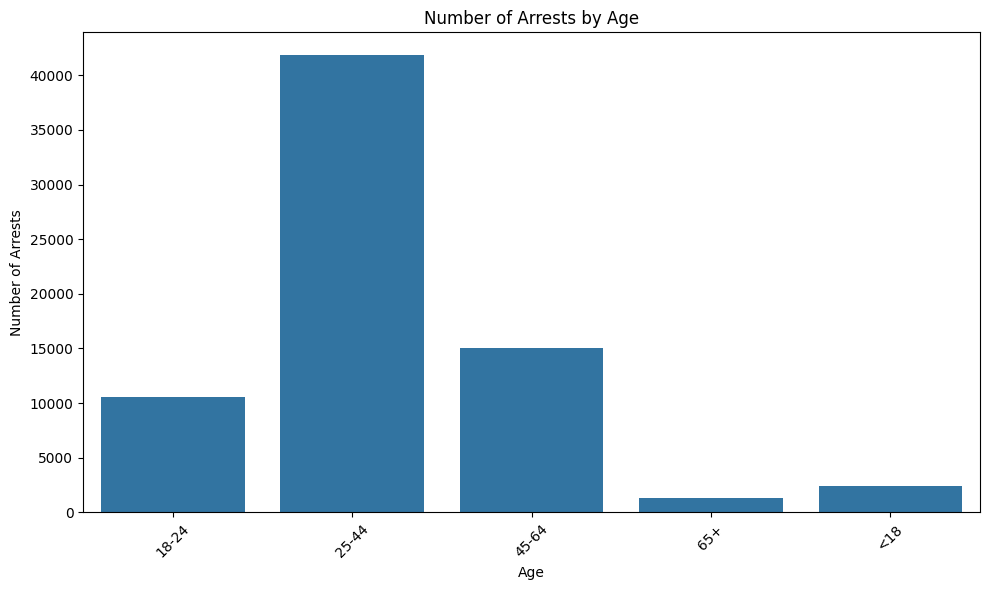

In [66]:
arrest_race_count = df.groupby(['age_group'])['arrest_key'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_race_count.index, y=arrest_race_count.values)
plt.title('Number of Arrests by Age')
plt.xlabel('Age')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
df_dates = df[['arrest_key', 'arrest_date', 'age_group', 'perp_sex', 'perp_race', 'arrest_boro']].copy()
df_dates.head()

,arrest_key,arrest_date,age_group,perp_sex,perp_race,arrest_boro
0,298874520,2025-01-04T00:00:00.000,25-44,M,BLACK,M
1,298799078,2025-01-02T00:00:00.000,25-44,F,BLACK,M
2,298921520,2025-01-05T00:00:00.000,45-64,M,WHITE,K
3,299008265,2025-01-07T00:00:00.000,45-64,M,BLACK,Q
4,298969999,2025-01-06T00:00:00.000,25-44,M,WHITE,M


In [68]:
df_dates.loc[:, 'date'] = pd.to_datetime(df_dates['arrest_date']).dt.normalize().sort_values()
df_dates.loc[:,'day_of_week'] = df_dates['date'].dt.day_name()
df_dates = df_dates.sort_values(by='date')

df_dates.head()

,arrest_key,arrest_date,age_group,perp_sex,perp_race,arrest_boro,date,day_of_week
7631,298725450,2025-01-01T00:00:00.000,25-44,M,BLACK,M,2025-01-01,Wednesday
4780,298748766,2025-01-01T00:00:00.000,25-44,M,BLACK,K,2025-01-01,Wednesday
19557,298759670,2025-01-01T00:00:00.000,<18,M,BLACK,K,2025-01-01,Wednesday
16678,298742641,2025-01-01T00:00:00.000,45-64,M,WHITE HISPANIC,M,2025-01-01,Wednesday
10446,298711183,2025-01-01T00:00:00.000,45-64,M,BLACK,Q,2025-01-01,Wednesday


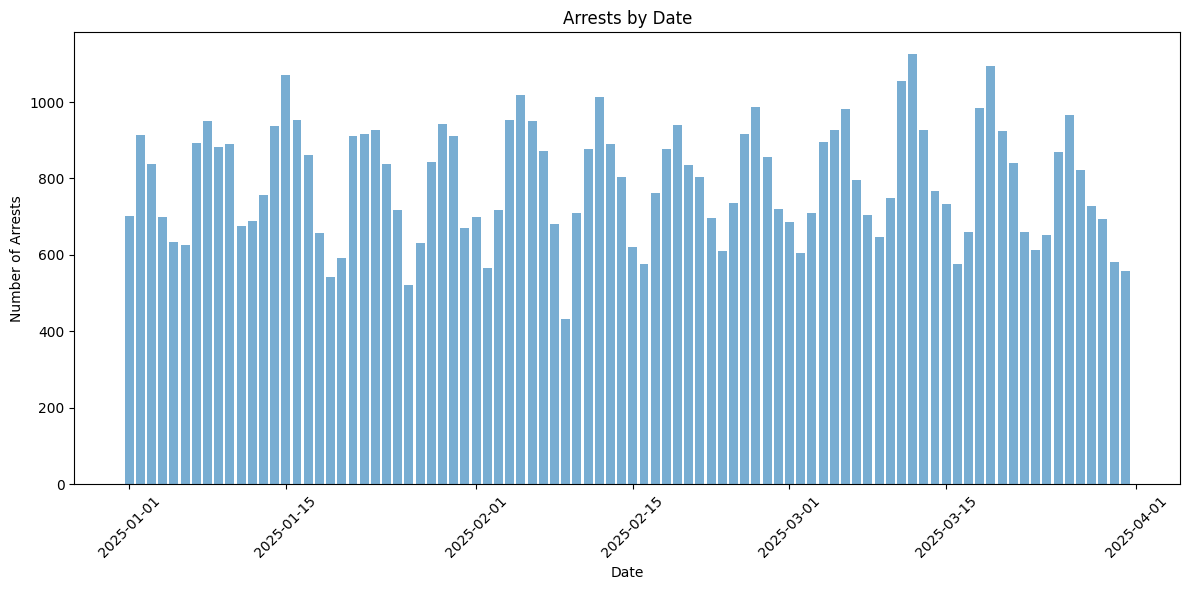

In [69]:
df_daily_arrest = df_dates.groupby(['date'])['arrest_key'].count()

plt.figure(figsize=(12, 6))
plt.bar(df_daily_arrest.index, df_daily_arrest.values, alpha=0.6) # alpha = transparency
plt.title('Arrests by Date')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

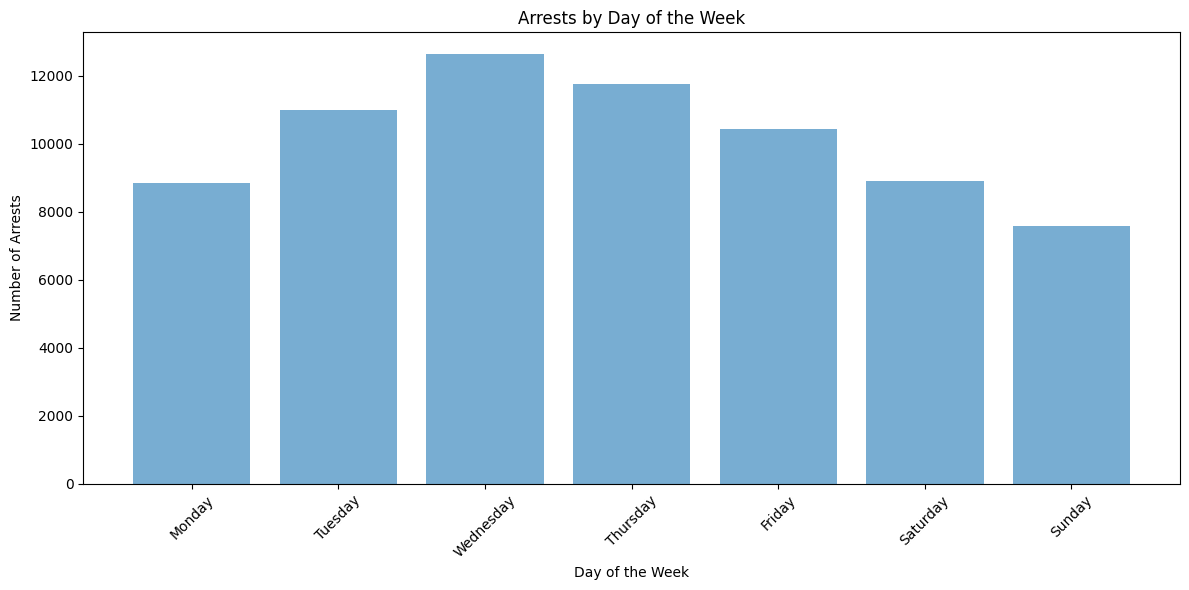

In [70]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day_data = df_dates.groupby(['day_of_week'])['arrest_key'].count().reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(df_day_data.index, df_day_data.values, alpha=0.6) # alpha = transparency
plt.title('Arrests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [71]:
# max and min daily arrests and dates
peak_arrests = df_daily_arrest.max()
peak_date = df_daily_arrest.idxmax()

lowest_arrests = df_daily_arrest.min()
lowest_date = df_daily_arrest.idxmin()

mean_arrests = df_daily_arrest.mean()
median_arrests = df_daily_arrest.median()

print(f"Peak arrests: {peak_arrests} on {peak_date}")
print(f"Lowest arrests: {lowest_arrests} on {lowest_date}")
print(f"Mean daily arrests: {round(mean_arrests, 1)}")
print(f"Median daily arrests: {round(median_arrests, 1)}")

Peak arrests: 1126 on 2025-03-12 00:00:00
Lowest arrests: 433 on 2025-02-09 00:00:00
Mean daily arrests: 791.6
Median daily arrests: 799.5
